In [203]:
# Suppress Warning messages
import warnings
warnings.simplefilter(action='ignore')

In [204]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [205]:
PROBLEM_NAME = 'FourPeaks'
ALGORITHM_NAME = 'GA'

In [206]:
PROBLEM_SIZE = 30
T_PCT = '0.4'

In [207]:
out_dir = f'metrics'
os.makedirs(out_dir, exist_ok=True)

In [208]:
all_df = pd.read_csv(f'metrics/{ALGORITHM_NAME.lower()}.csv')

In [209]:
all_df.columns

Index(['Iteration', 'Time', 'Fitness', 'FEvals', 'Population Size',
       'Mutation Rate', 'max_iters', 'problem_size', 't_pct', 'max_attempts',
       'run_number', 'group_timestamp'],
      dtype='object')

In [210]:
print(all_df['Mutation Rate'].unique())
print(all_df['Population Size'].unique())

[0.01 0.1  0.5 ]
[  10  100 1000]


In [211]:
# all_df = all_df[all_df['Mutation Rate'] == 0.1]
# all_df = all_df[all_df['Population Size'] == 1000]

In [212]:
all_df['X'] = all_df.apply(lambda row: f"Pop={int(row['Population Size'])}, Mut={row['Mutation Rate']}", axis=1)

In [213]:
all_df['X'].unique()

array(['Pop=10, Mut=0.01', 'Pop=100, Mut=0.01', 'Pop=1000, Mut=0.01',
       'Pop=10, Mut=0.1', 'Pop=100, Mut=0.1', 'Pop=1000, Mut=0.1',
       'Pop=10, Mut=0.5', 'Pop=100, Mut=0.5', 'Pop=1000, Mut=0.5'],
      dtype=object)

In [214]:
def get_color(X):
    if 'Mut=0.01' in X:
        return 'red'
    elif 'Mut=0.1' in X:
        return 'blue'
    elif 'Mut=0.5' in X:
        return 'green'
def get_style(X):
    if 'Pop=10,' in X:
        return 'dotted'
    elif 'Pop=100,' in X:
        return '--'
    elif 'Pop=1000,' in X:
        return '-'

In [215]:
metrics = {}

for group in sorted(all_df['X'].unique()):
    df = all_df[all_df['X'] == group]
    assert(len(df['group_timestamp'].unique()) == 1)
    last_iter = df['Iteration'].max()
    metrics[group] = {
        'iter': [],
        'fitness_mean': [],
        'fitness_std': [],
    }
    for iter_i in range(1, last_iter+1):
        iter_df = df[df['Iteration'] == iter_i]
        metrics[group]['iter'].append(iter_i)
        metrics[group]['fitness_mean'].append(iter_df['Fitness'].mean())
        metrics[group]['fitness_std'].append(iter_df['Fitness'].std())

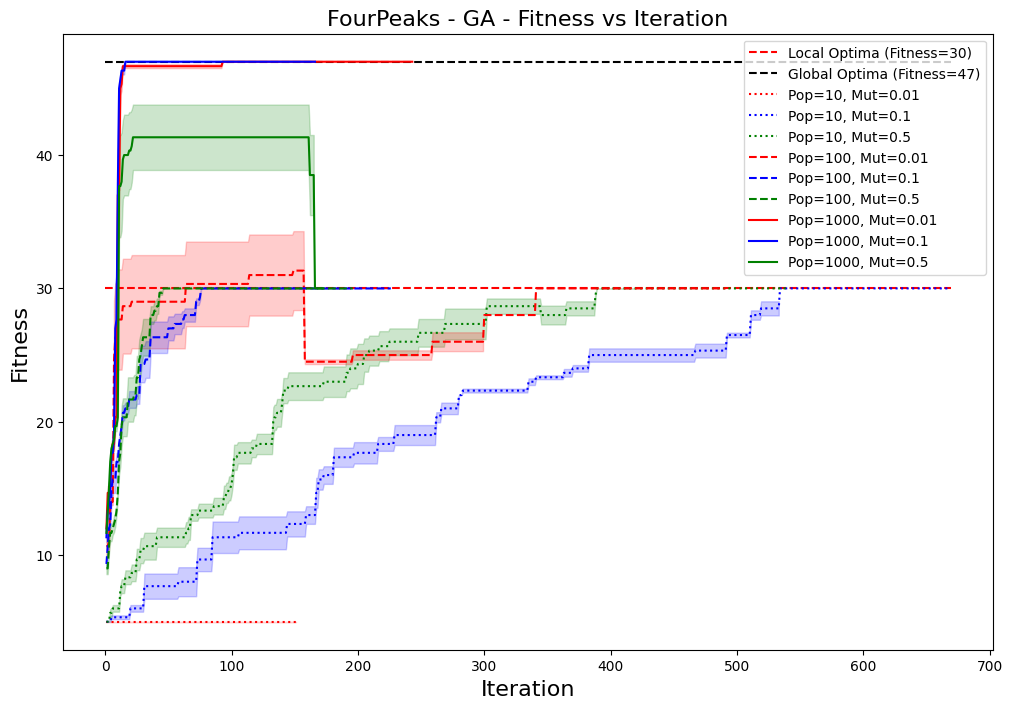

In [217]:
fontsize = 16
plt.figure(figsize=(12, 8))
last_iter = all_df['Iteration'].max()
plt.hlines(30, 0, last_iter, color='red', linestyle='dashed', alpha=1.0, label='Local Optima (Fitness=30)')
plt.hlines(47, 0, last_iter, color='black', linestyle='dashed', alpha=1.0, label='Global Optima (Fitness=47)')
for group in metrics:
    linestyle = get_style(group)
    color = get_color(group)
    plt.plot(metrics[group]['iter'], metrics[group]['fitness_mean'], label=group, color=color, linestyle=linestyle)
    mean = np.array(metrics[group]['fitness_mean'])
    std = np.array(metrics[group]['fitness_std']) / 4
    lower = mean - std
    upper = mean + std 
    plt.fill_between(metrics[group]['iter'], lower, upper, alpha=0.2, color=color)
plt.title(f'{PROBLEM_NAME} - {ALGORITHM_NAME} - Fitness vs Iteration', fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Fitness', fontsize=fontsize)
plt.legend()
plt.savefig(f'{out_dir}/{PROBLEM_NAME}_{ALGORITHM_NAME.lower()}_fitness_vs_iteration.png')